## TUGAS 5-Mini Project-Data Curah Hujan 15 Kab/Kota di Kalimantan

Diperoleh data yang memuat curah hujan dari 5 Provinsi di Kalimantan. Dengan masing-masing provinsi diwakili oleh 3 kab/kota. Berikut merupakan rincian Provinsi dan Kota yang termuat dalam data :
1. Kalimantan Timur(Samarinda, Balikpapan, Sendawar)
2. Kalimantan Utara(Tarakan, Tanjungselor, Malinau)
3. Kalimantan Tengah(Palangkaraya, Purukcahu, Pangkalanbun)
4. Kalimantan Selatan(Banjarmasin, Kota Baru, Barabai)
5. Kalimantan Barat(Pontianak, Ketapang, Sintang)

In [1]:
using CSV
using DataFrames
using Plots
using Measures
using LinearAlgebra
using VMLS
using StatsBase
using GLM

In [2]:
data_ch = CSV.read("data_ch2.csv", DataFrame);

In [3]:
ENV["LINES"] = 228;
ENV["COLUMNS"] = 1000;

In [4]:
@show typeof(data_ch)
data_ch

typeof(data_ch) = DataFrame


,Waktu,Samarinda,Balikpapan,Sendawar,Tarakan,Tanjungselor,Malinau,Palangkaraya,Purukcahu,Pangkalanbun,Banjarmasin,KotaBaru,Barabai,Pontianak,Ketapang,Sintang
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Jan-01,162.79,144.95,179.15,84.99,92.16,84.98,129.66,128.62,131.5,151.62,102.65,191.26,58.57,106.28,104.75
2,Feb-01,133.22,150.68,119.72,38.64,52.84,59.17,162.57,147.75,42.58,144.16,117.99,120.18,31.77,51.94,76.04
3,Mar-01,82.9774,90.6084,118.192,132.794,120.726,141.647,161.558,137.686,61.2224,61.3568,98.5444,95.9943,64.7117,96.8544,100.322
4,Apr-01,101.92,94.18,119.02,83.98,76.59,110.42,219.61,138.52,76.5,108.97,32.72,73.15,80.39,141.54,213.03
5,May-01,19.11,16.9,80.44,101.61,77.33,184.68,76.98,98.89,90.93,25.31,26.71,19.46,67.57,48.62,122.97
6,Jun-01,133.49,111.04,83.63,32.17,39.23,46.91,66.74,81.79,32.77,45.45,74.47,101.52,43.69,62.28,36.73
7,Jul-01,30.99,32.01,44.66,81.03,73.03,87.11,51.86,56.19,58.64,41.73,18.14,53.51,4.34,73.2,75.28
8,Aug-01,78.8712,93.6209,100.308,71.4065,44.4853,71.5301,46.9517,36.2499,60.5117,47.5789,61.8022,47.9281,-0.000959598,2.92181,29.9689
9,Sep-01,157.07,129.06,152.97,94.74,75.48,93.24,122.77,173.05,117.16,97.97,79.03,139.0,45.24,101.82,159.67


### UKURAN PEMUSATAN DATA

In [5]:
describe(data_ch)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Waktu,,Apr-01,,Sep-19,0,String
2,Samarinda,87.0586,1.54,81.24,232.86,0,Float64
3,Balikpapan,84.8925,1.09886,82.495,269.68,0,Float64
4,Sendawar,109.69,19.53,98.8629,442.27,0,Float64
5,Tarakan,69.9168,5.15,68.995,159.44,0,Float64
6,Tanjungselor,62.4312,10.05,61.335,157.71,0,Float64
7,Malinau,117.983,11.4,113.97,249.94,0,Float64
8,Palangkaraya,120.373,14.71,116.97,278.93,0,Float64
9,Purukcahu,107.825,25.44,104.568,212.9,0,Float64


In [6]:
println("Samarinda")
describe(data_ch.Samarinda)

println("Balikpapan")
describe(data_ch.Balikpapan)

println("Sendawar")
describe(data_ch.Sendawar)

println("Tarakan")
describe(data_ch.Tarakan)

println("Tanjungselor")
describe(data_ch.Tanjungselor)

println("Malinau")
describe(data_ch.Malinau)

println("Palangkaraya")
describe(data_ch.Palangkaraya)

println("Purukcahu")
describe(data_ch.Purukcahu)

println("Pangkalanbun")
describe(data_ch.Pangkalanbun)

println("Banjarmasin")
describe(data_ch.Banjarmasin)

println("Kota Baru")
describe(data_ch.KotaBaru)

println("Tanjungselor")
describe(data_ch.Barabai)

println("Pontianak")
describe(data_ch.Pontianak)

println("Ketapang")
describe(data_ch.Ketapang)

println("Sintang")
describe(data_ch.Sintang)

Samarinda
Summary Stats:
Length:         228
Missing Count:  0
Mean:           87.058643
Minimum:        1.540000
1st Quartile:   48.827500
Median:         81.240000
3rd Quartile:   122.149999
Maximum:        232.860001
Type:           Float64
Balikpapan
Summary Stats:
Length:         228
Missing Count:  0
Mean:           84.892471
Minimum:        1.098855
1st Quartile:   48.192500
Median:         82.495000
3rd Quartile:   113.575000
Maximum:        269.680000
Type:           Float64
Sendawar
Summary Stats:
Length:         228
Missing Count:  0
Mean:           109.689979
Minimum:        19.530000
1st Quartile:   71.427500
Median:         98.862871
3rd Quartile:   134.550001
Maximum:        442.270001
Type:           Float64
Tarakan
Summary Stats:
Length:         228
Missing Count:  0
Mean:           69.916848
Minimum:        5.150000
1st Quartile:   49.960000
Median:         68.994999
3rd Quartile:   88.552499
Maximum:        159.440000
Type:           Float64
Tanjungselor
Summary Stat

### Line Plots

Akan dilakukan plot data curah hujan di masing-masing Provinsi.

In [7]:
x = data_ch.Waktu; 
k1=data_ch.Samarinda; k2= data_ch.Balikpapan; k3= data_ch.Sendawar;
y1= data_ch.Tarakan; y2= data_ch.Tanjungselor;y3=data_ch.Malinau;
y4= data_ch.Palangkaraya; y5= data_ch.Purukcahu; y6= data_ch.Pangkalanbun;
y7= data_ch.Banjarmasin; y8= data_ch.KotaBaru; y9= data_ch.Barabai;
y10= data_ch.Pontianak; y11= data_ch.Ketapang; y12= data_ch.Sintang;

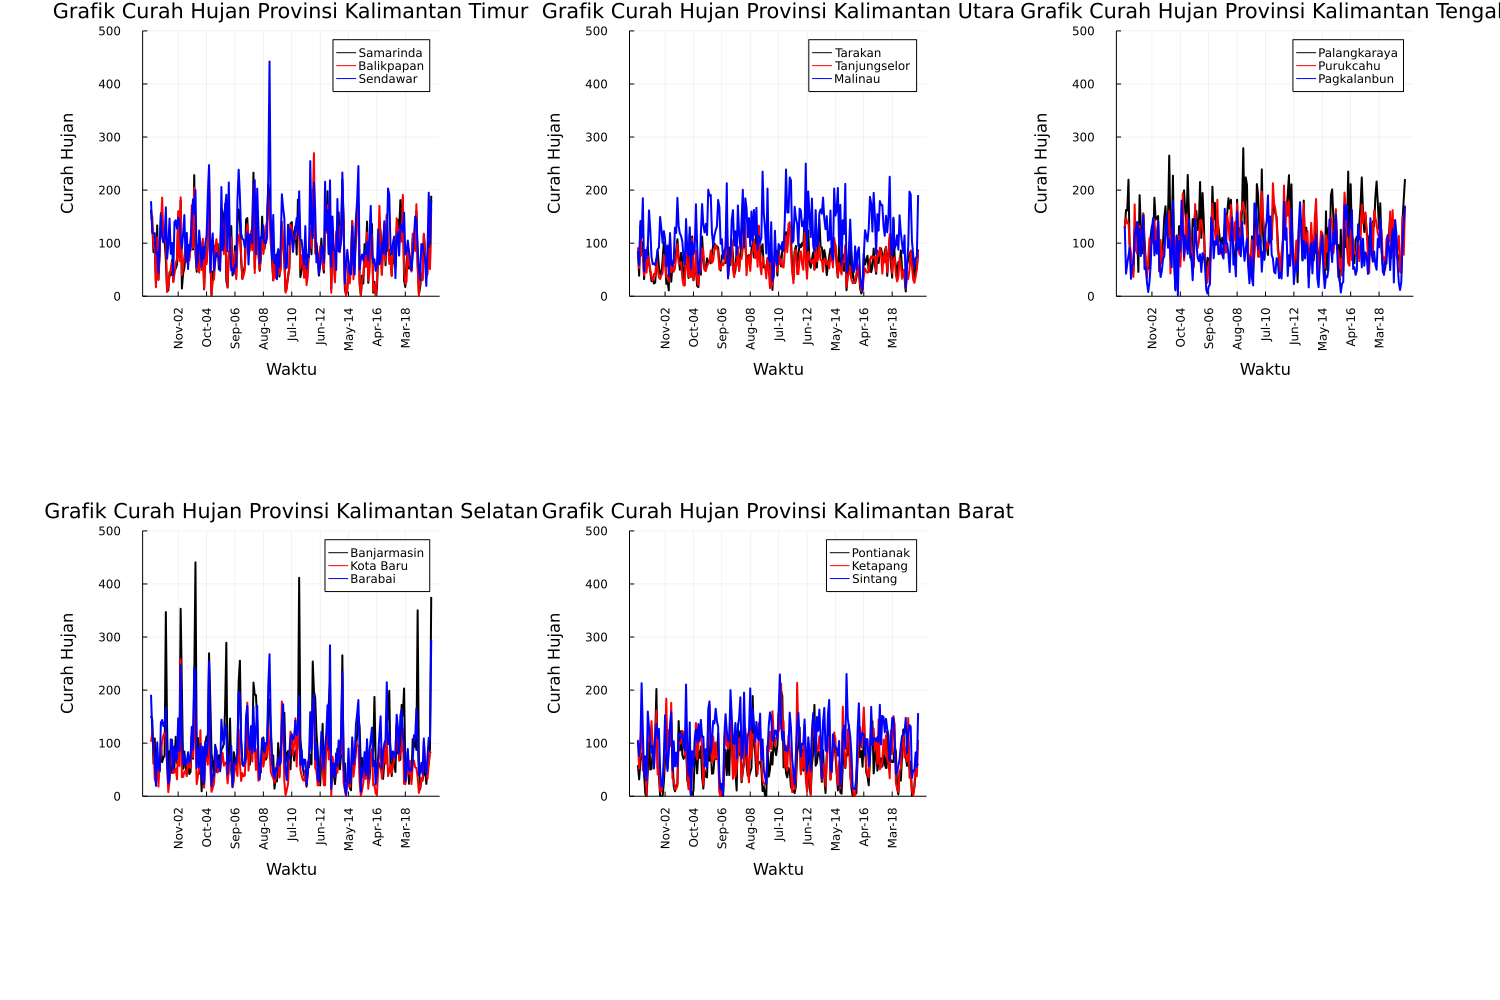

In [74]:
p1= plot(x, [k1, k2, k3], xaxis= "Waktu", yaxis="Curah Hujan", xrotation=90, xtickfont=font(8), 
    label=["Samarinda" "Balikpapan" "Sendawar"], color=["Black" "Red" "Blue"], bottom_margin=40mm, 
    left_margin=20mm,right_margin=10mm, size=(1500, 1000), 
    linewidth=2, title="Grafik Curah Hujan Provinsi Kalimantan Timur")

p2= plot(x, [y1, y2, y3], xaxis= "Waktu", yaxis="Curah Hujan", xrotation=90, xtickfont=font(8), 
    label=["Tarakan" "Tanjungselor" "Malinau"], color=["Black" "Red" "Blue"], bottom_margin=40mm, 
    left_margin=20mm, right_margin=10mm, size=(1500, 1000), 
    linewidth=2, title="Grafik Curah Hujan Provinsi Kalimantan Utara")

p3= plot(x, [y4, y5, y6], xaxis= "Waktu", yaxis="Curah Hujan", xrotation=90, xtickfont=font(8), 
     label=["Palangkaraya" "Purukcahu" "Pagkalanbun"], color=["Black" "Red" "Blue"], bottom_margin=40mm, 
    left_margin=20mm, right_margin=20mm, size=(1500, 1000), 
    linewidth=2, title="Grafik Curah Hujan Provinsi Kalimantan Tengah")

p4= plot(x, [y7, y8, y9], xaxis= "Waktu", yaxis="Curah Hujan", xrotation=90, xtickfont=font(8), 
    label=["Banjarmasin" "Kota Baru" "Barabai"], color=["Black" "Red" "Blue"], bottom_margin=40mm, 
    left_margin=20mm, right_margin=10mm, size=(1500, 1000), 
    linewidth=2, title="Grafik Curah Hujan Provinsi Kalimantan Selatan")

p5= plot(x, [y10, y11, y12], xaxis= "Waktu", yaxis="Curah Hujan", xrotation=90, xtickfont=font(8), 
    label=["Pontianak" "Ketapang" "Sintang"], color=["Black" "Red" "Blue"], bottom_margin=40mm, 
    left_margin=20mm, right_margin=10mm, size=(1500, 1000), 
    linewidth=2, title="Grafik Curah Hujan Provinsi Kalimantan Barat")

plot!(p1, p2, p3, p4, p5, ylims = (0,500))

### Histogram

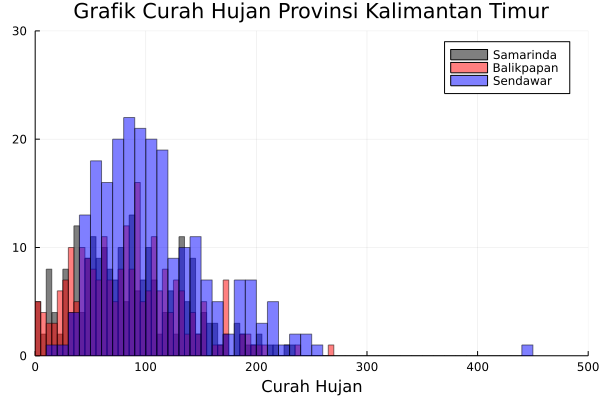

In [75]:
histogram(k1, bins=50, alpha=0.5, label="Samarinda", color="black")
histogram!(k2, bins=50, alpha=0.5, label="Balikpapan", color="red")
histogram!(k3, bins=50, alpha=0.5, label="Sendawar", color="blue", xlabel="Curah Hujan", 
    title="Grafik Curah Hujan Provinsi Kalimantan Timur", xlims = (0,500), ylims=(0, 30))

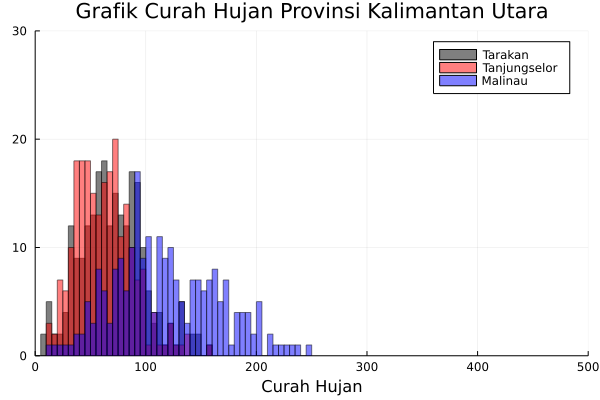

In [76]:
histogram(y1, bins=50, alpha=0.5, label="Tarakan", color="black")
histogram!(y2, bins=50, alpha=0.5, label="Tanjungselor", color="red")
histogram!(y3, bins=50, alpha=0.5, label="Malinau", color="blue", xlabel="Curah Hujan", 
title="Grafik Curah Hujan Provinsi Kalimantan Utara", xlims = (0,500), ylims=(0, 30))

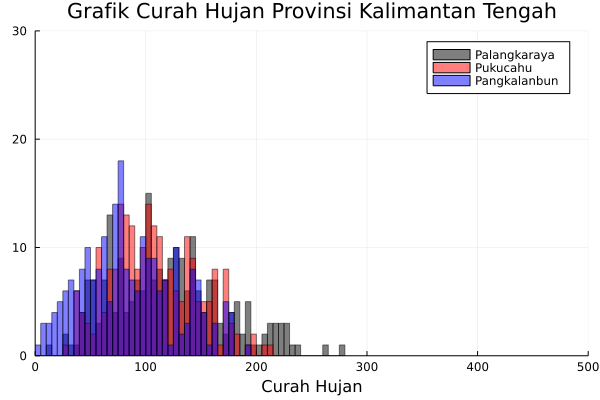

In [154]:
histogram(y4, bins=50, alpha=0.5, label="Palangkaraya", color="black")
histogram!(y5, bins=50, alpha=0.5, label="Pukucahu", color="red")
histogram!(y6, bins=50, alpha=0.5, label="Pangkalanbun", color="blue", xlabel="Curah Hujan", 
    title="Grafik Curah Hujan Provinsi Kalimantan Tengah", xlims = (0,500), ylims=(0,30))

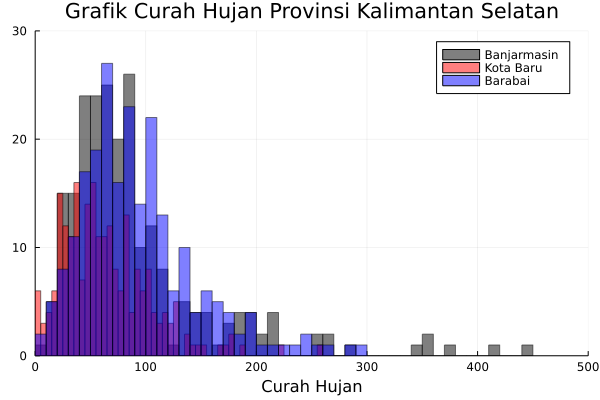

In [78]:
histogram(y7, bins=50, alpha=0.5, label="Banjarmasin", color="black")
histogram!(y8, bins=50, alpha=0.5, label="Kota Baru", color="red")
histogram!(y9, bins=50, alpha=0.5, label="Barabai", color="blue", xlabel="Curah Hujan", 
    title="Grafik Curah Hujan Provinsi Kalimantan Selatan", xlims = (0,500), ylims=(0, 30))

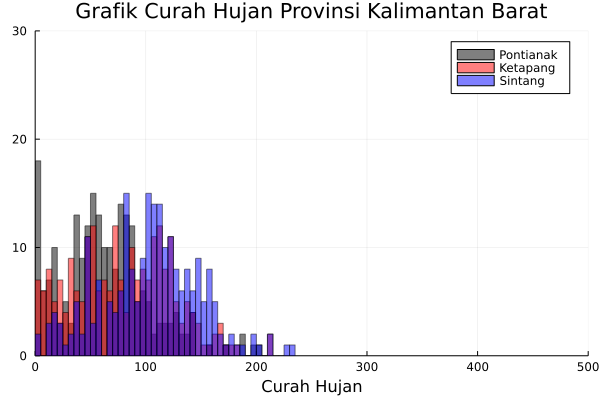

In [79]:
histogram(y10, bins=50, alpha=0.5, label="Pontianak", color="black")
histogram!(y11, bins=50, alpha=0.5, label="Ketapang", color="red")
histogram!(y12, bins=50, alpha=0.5, label="Sintang", color="blue", xlabel="Curah Hujan", 
    title="Grafik Curah Hujan Provinsi Kalimantan Barat", xlims = (0,500), ylims=(0, 30))

## Estimasi Trend and Seasonal Component Curah Hujan Beberapa Kota di Pulau Kalimantan

Hujan merupakan bentuk presipitasi atau proses terjadinya pengendapan air dari atmosfer ke permukaan bumi dalam bentuk cair (hujan) dan padat (salju). Intensitas hujan dipengaruhi oleh banyak faktor seperti letak geografis, topografi, arah angin dan lain-lain.Hujan merupakan salah satu fenomena yang berpengaruh terhadap berbagai sektor dikehidupan, sehingga kajian mengenai hujan menjadi menarik untuk dikaji, salah satunya untuk mengetahui estimasi dari trend data curah hujan.

Trend adalah keadaan data yang naik atau turun sering waktu ke waktu. Trend dapat dibagi dua, yaitu :
1. trend yang terpengaruh oleh pola data musiman
2. trend yang tidak terpengaruh oleh pola data musiman.

Dari data curah hujan beberapa kota di Kalimantan dan akan dilakukan :
1. Estimasi Trend dan Seasonal Component
2. Mengamati apakah trend naik atau turun
3. Membandingkan trend tanpa pengaruh musim dan trend dengan pengaruh musim dengan 
   mengamati grafik dan dengan mempertimbangkan nilai Root Mean Square Error(RMSE)  dari selisih trend dan data yang ada.

Data yang digunakan merupakan data curah hujan di Samarinda, Tanjung Selor, Palangkaraya, Banjar masin, dan Sintang. Data ini memuat 228 data yang berasal dari data bulanan selama kurun waktu 19 tahun.

## 1. Samarinda-Provinsi Kalimantan Timur

### Estimation of Trend 

  Akan ditentukan estimasi trend dengan menyelesaikan SPL Aθ=k1, sehingga haruslah di definisikan k1 dan A

In [80]:
data1 = k1;
n = length(data1);
A1 = [ ones(n) 1:n ]

228×2 Matrix{Float64}:
 1.0    1.0
 1.0    2.0
 1.0    3.0
 1.0    4.0
 1.0    5.0
 1.0    6.0
 1.0    7.0
 1.0    8.0
 1.0    9.0
 1.0   10.0
 1.0   11.0
 1.0   12.0
 1.0   13.0
 1.0   14.0
 1.0   15.0
 1.0   16.0
 1.0   17.0
 1.0   18.0
 1.0   19.0
 1.0   20.0
 1.0   21.0
 1.0   22.0
 1.0   23.0
 1.0   24.0
 1.0   25.0
 1.0   26.0
 1.0   27.0
 1.0   28.0
 1.0   29.0
 1.0   30.0
 1.0   31.0
 1.0   32.0
 1.0   33.0
 1.0   34.0
 1.0   35.0
 1.0   36.0
 1.0   37.0
 1.0   38.0
 1.0   39.0
 1.0   40.0
 1.0   41.0
 1.0   42.0
 1.0   43.0
 1.0   44.0
 1.0   45.0
 1.0   46.0
 1.0   47.0
 1.0   48.0
 1.0   49.0
 1.0   50.0
 1.0   51.0
 1.0   52.0
 1.0   53.0
 1.0   54.0
 1.0   55.0
 1.0   56.0
 1.0   57.0
 1.0   58.0
 1.0   59.0
 1.0   60.0
 1.0   61.0
 1.0   62.0
 1.0   63.0
 1.0   64.0
 1.0   65.0
 1.0   66.0
 1.0   67.0
 1.0   68.0
 1.0   69.0
 1.0   70.0
 1.0   71.0
 1.0   72.0
 1.0   73.0
 1.0   74.0
 1.0   75.0
 1.0   76.0
 1.0   77.0
 1.0   78.0
 1.0   79.0
 1.0   80.0
 1.0   81.0
 1.0 

diperoleh θ :

In [81]:
theta1 = A1 \ k1

2-element Vector{Float64}:
 89.18015461401026
 -0.01852848357252519

sehingga diperoleh :
garis_tren1= 89.18015461401026-0.01852848357252519i atau dapat dihitung dengan cara dibawah ini,

In [82]:
Garis_tren1= A1*theta1

228-element Vector{Float64}:
 89.16162613043774
 89.14309764686521
 89.12456916329269
 89.10604067972017
 89.08751219614764
 89.06898371257512
 89.05045522900258
 89.03192674543006
 89.01339826185753
 88.99486977828501
 88.97634129471248
 88.95781281113996
 88.93928432756744
 88.92075584399491
 88.90222736042239
 88.88369887684986
 88.86517039327734
 88.84664190970481
 88.82811342613229
 88.80958494255975
 88.79105645898723
 88.7725279754147
 88.75399949184218
 88.73547100826966
 88.71694252469713
 88.69841404112461
 88.67988555755208
 88.66135707397956
 88.64282859040703
 88.62430010683451
 88.60577162326199
 88.58724313968946
 88.56871465611694
 88.5501861725444
 88.53165768897188
 88.51312920539935
 88.49460072182683
 88.4760722382543
 88.45754375468178
 88.43901527110926
 88.42048678753673
 88.40195830396421
 88.38342982039168
 88.36490133681916
 88.34637285324663
 88.32784436967411
 88.30931588610157
 88.29078740252905
 88.27225891895652
 88.253730435384
 88.23520195181148
 88.216

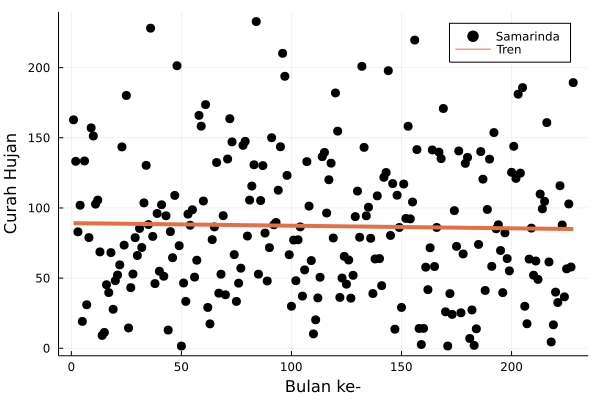

In [83]:
scatter(1:228, k1, color="black", label="Samarinda", markersize=5, xaxis="Bulan ke-", yaxis="Curah Hujan")
plot!(1:228, A1*theta1, linewidth=4, label="Tren")

In [84]:
rms(Garis_tren1-k1)

50.2317559941827

### Estimation of Trend and Seasonal Component

Akan diestimasi nilai trend1 dengan menyelesaikan SPL Ax1=b1 dibawah ini, 

In [85]:
 m = 19*12;
 A11 = [ 0:(m-1) vcat([eye(12) for i=1:19]...) ];

In [86]:
b1=k1;

In [87]:
x1= A11 \ b1

13-element Vector{Float64}:
  -0.03531468342708316
 120.88498900817766
  55.24286159828894
  47.14271547050545
  57.76035605251151
  66.13948462435962
  88.59262688936568
  89.39631426174012
  78.19156032885138
  93.30921537648899
 107.4406715083371
 120.19598247544853
 168.50554017308602

diperoleh tren1 merupakan titik-titik pada grafik trend

In [88]:
tren1=A11*x1

228-element Vector{Float64}:
 120.88498900817766
  55.20754691486186
  47.07208610365129
  57.65441200223026
  65.9982258906513
  88.41605347223026
  89.18442616117761
  77.9443575448618
  93.02669790907233
 107.12283935749336
 119.8428356411777
 168.1170786553881
 120.46121280705266
  54.78377071373686
  46.648309902526286
  57.230635801105265
  65.57444968952629
  87.99227727110527
  88.76064996005262
  77.52058134373681
  92.60292170794733
 106.69906315636835
 119.4190594400527
 167.69330245426312
 120.03743660592765
  54.35999451261186
  46.22453370140129
  56.806859599980264
  65.1506734884013
  87.56850106998026
  88.33687375892762
  77.0968051426118
  92.17914550682234
 106.27528695524336
 118.9952832389277
 167.2695262531381
 119.61366040480266
  53.93621831148686
  45.80075750027629
  56.38308339885527
  64.7268972872763
  87.14472486885526
  87.91309755780263
  76.6730289414868
  91.75536930569733
 105.85151075411837
 118.5715070378027
 166.8457500520131
 119.18988420367766
 

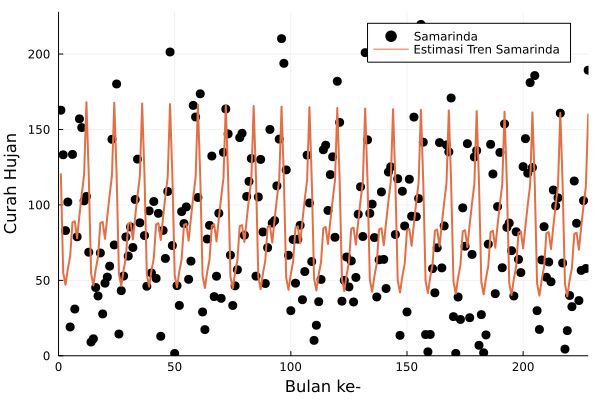

In [143]:
scatter(1:m, b1, color="black", markersize=5, label="Samarinda");
plot!(1:m, A11*x1, linewidth=2, label="Estimasi Tren Samarinda",
    xlims=(0,228), ylim=(0,228), xlabel="Bulan ke-", ylabel="Curah Hujan")

In [90]:
stdev(b1)

50.24655687334143

In [91]:
rms(tren1-k1)

37.8239575676339

## 2. Tanjungselor-Provinsi Kalimantan Utara

### Estimation of Trend

  Akan ditentukan estimasi trend dengan menyelesaikan SPL Aθ=k1, sehingga haruslah di definisikan k1 dan A

In [92]:
data2 = y2;
n = length(data2);
A2 = [ ones(n) 1:n ]

228×2 Matrix{Float64}:
 1.0    1.0
 1.0    2.0
 1.0    3.0
 1.0    4.0
 1.0    5.0
 1.0    6.0
 1.0    7.0
 1.0    8.0
 1.0    9.0
 1.0   10.0
 1.0   11.0
 1.0   12.0
 1.0   13.0
 1.0   14.0
 1.0   15.0
 1.0   16.0
 1.0   17.0
 1.0   18.0
 1.0   19.0
 1.0   20.0
 1.0   21.0
 1.0   22.0
 1.0   23.0
 1.0   24.0
 1.0   25.0
 1.0   26.0
 1.0   27.0
 1.0   28.0
 1.0   29.0
 1.0   30.0
 1.0   31.0
 1.0   32.0
 1.0   33.0
 1.0   34.0
 1.0   35.0
 1.0   36.0
 1.0   37.0
 1.0   38.0
 1.0   39.0
 1.0   40.0
 1.0   41.0
 1.0   42.0
 1.0   43.0
 1.0   44.0
 1.0   45.0
 1.0   46.0
 1.0   47.0
 1.0   48.0
 1.0   49.0
 1.0   50.0
 1.0   51.0
 1.0   52.0
 1.0   53.0
 1.0   54.0
 1.0   55.0
 1.0   56.0
 1.0   57.0
 1.0   58.0
 1.0   59.0
 1.0   60.0
 1.0   61.0
 1.0   62.0
 1.0   63.0
 1.0   64.0
 1.0   65.0
 1.0   66.0
 1.0   67.0
 1.0   68.0
 1.0   69.0
 1.0   70.0
 1.0   71.0
 1.0   72.0
 1.0   73.0
 1.0   74.0
 1.0   75.0
 1.0   76.0
 1.0   77.0
 1.0   78.0
 1.0   79.0
 1.0   80.0
 1.0   81.0
 1.0 

diperoleh θ:

In [93]:
theta2 = A2 \ y2

2-element Vector{Float64}:
 65.7382784896043
 -0.02888246215620084

sehingga diperoleh :

garis_tren2= 65.7382784896043 -0.02888246215620084i atau dapat dihitung dengan cara dibawah ini,

In [94]:
Garis_trend2= A2*theta2

228-element Vector{Float64}:
 65.7093960274481
 65.68051356529189
 65.6516311031357
 65.6227486409795
 65.59386617882329
 65.56498371666709
 65.5361012545109
 65.50721879235469
 65.47833633019849
 65.44945386804228
 65.4205714058861
 65.39168894372989
 65.36280648157368
 65.33392401941748
 65.30504155726129
 65.27615909510509
 65.24727663294888
 65.21839417079268
 65.18951170863649
 65.16062924648028
 65.13174678432408
 65.10286432216787
 65.07398186001168
 65.04509939785548
 65.01621693569928
 64.98733447354307
 64.95845201138688
 64.92956954923068
 64.90068708707447
 64.87180462491827
 64.84292216276206
 64.81403970060587
 64.78515723844967
 64.75627477629347
 64.72739231413726
 64.69850985198107
 64.66962738982487
 64.64074492766866
 64.61186246551246
 64.58298000335627
 64.55409754120006
 64.52521507904386
 64.49633261688766
 64.46745015473147
 64.43856769257526
 64.40968523041906
 64.38080276826285
 64.35192030610666
 64.32303784395046
 64.29415538179425
 64.26527291963805
 64.236

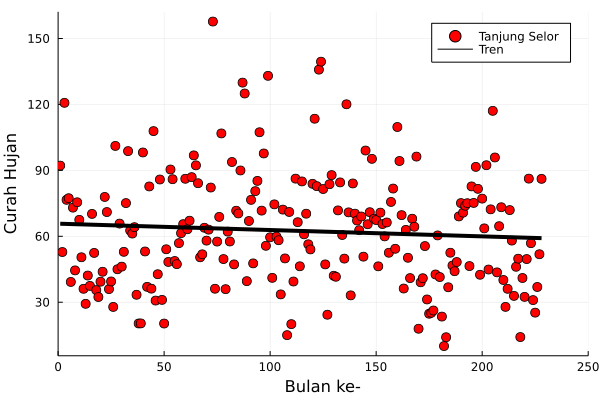

In [146]:
scatter(1:228, y2, color="red", label="Tanjung Selor", markersize=5, xaxis="Bulan ke-", yaxis="Curah Hujan")
plot!(1:228, A2*theta2, color="black", linewidth=4, label="Tren", xlim=(0,250), ylim=(0.500))

In [96]:
rms(Garis_trend2-y2)

25.759940334343753

### Estimation of Trend and Seasonal Component

Akan diestimasi nilai trend2 dengan menyelesaikan SPL Ax2=b2 dibawah ini, 

In [97]:
 m = 19*12;
 A22 = [ 0:(m-1) vcat([eye(12) for i=1:19]...) ];

In [98]:
b2=y2;

In [99]:
x2= A22 \ b2

13-element Vector{Float64}:
 -0.02698696217543856
 77.63655281494735
 50.698361398701785
 72.01988628982453
 81.36583599147367
 72.62035739522805
 59.30036166108773
 54.89422204536844
 57.23182712649121
 67.10805526866665
 65.0816106250526
 62.03288594196493
 65.9411247967719

In [100]:
tren2=A22*x2

228-element Vector{Float64}:
 77.63655281494735
 50.67137443652635
 71.96591236547366
 81.28487510494736
 72.5124095465263
 59.16542685021054
 54.732300272315804
 57.04291839126314
 66.89215957126314
 64.83872796547365
 61.76301632021054
 65.64426821284208
 77.31270926884208
 50.34753089042108
 71.64206881936839
 80.9610315588421
 72.18856600042103
 58.84158330410527
 54.408456726210545
 56.71907484515788
 66.56831602515787
 64.5148844193684
 61.43917277410528
 65.32042466673681
 76.98886572273682
 50.02368734431582
 71.31822527326312
 80.63718801273683
 71.86472245431578
 58.51773975800001
 54.08461318010528
 56.39523129905262
 66.24447247905262
 64.19104087326313
 61.115329228000014
 64.99658112063155
 76.66502217663157
 49.69984379821056
 70.99438172715786
 80.31334446663158
 71.54087890821052
 58.193896211894746
 53.76076963400002
 56.07138775294735
 65.92062893294735
 63.86719732715787
 60.791485681894756
 64.6727375745263
 76.3411786305263
 49.37600025210529
 70.67053818105259
 7

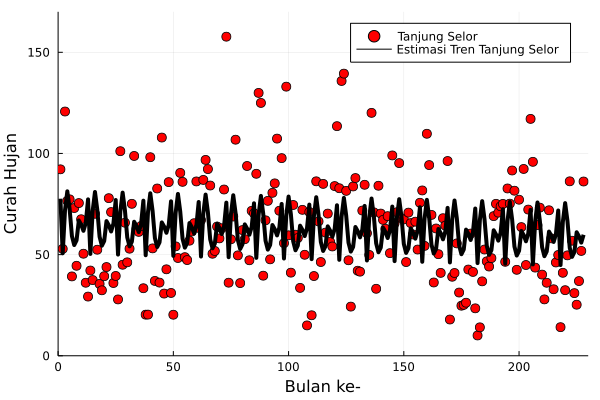

In [147]:
scatter(1:m, b2, color="red", markersize=5, label="Tanjung Selor");
plot!(1:m, A22*x2, linewidth=4, label="Estimasi Tren Tanjung Selor",
    xlims=(0,230), ylim=(0,170), color="black",xlabel="Bulan ke-", ylabel="Curah Hujan")

In [102]:
stdev(b2)

25.829986377683024

In [103]:
rms(tren2-y2)

24.18247784110381

## 3. Palangkaraya-Provinsi Kalimantan Tengah

### Estimation of Trend

  Akan ditentukan estimasi trend dengan menyelesaikan SPL Aθ=k1, sehingga haruslah di definisikan k1 dan A

In [104]:
data3 = y4;
n = length(data3);
A3 = [ ones(n) 1:n ]

228×2 Matrix{Float64}:
 1.0    1.0
 1.0    2.0
 1.0    3.0
 1.0    4.0
 1.0    5.0
 1.0    6.0
 1.0    7.0
 1.0    8.0
 1.0    9.0
 1.0   10.0
 1.0   11.0
 1.0   12.0
 1.0   13.0
 1.0   14.0
 1.0   15.0
 1.0   16.0
 1.0   17.0
 1.0   18.0
 1.0   19.0
 1.0   20.0
 1.0   21.0
 1.0   22.0
 1.0   23.0
 1.0   24.0
 1.0   25.0
 1.0   26.0
 1.0   27.0
 1.0   28.0
 1.0   29.0
 1.0   30.0
 1.0   31.0
 1.0   32.0
 1.0   33.0
 1.0   34.0
 1.0   35.0
 1.0   36.0
 1.0   37.0
 1.0   38.0
 1.0   39.0
 1.0   40.0
 1.0   41.0
 1.0   42.0
 1.0   43.0
 1.0   44.0
 1.0   45.0
 1.0   46.0
 1.0   47.0
 1.0   48.0
 1.0   49.0
 1.0   50.0
 1.0   51.0
 1.0   52.0
 1.0   53.0
 1.0   54.0
 1.0   55.0
 1.0   56.0
 1.0   57.0
 1.0   58.0
 1.0   59.0
 1.0   60.0
 1.0   61.0
 1.0   62.0
 1.0   63.0
 1.0   64.0
 1.0   65.0
 1.0   66.0
 1.0   67.0
 1.0   68.0
 1.0   69.0
 1.0   70.0
 1.0   71.0
 1.0   72.0
 1.0   73.0
 1.0   74.0
 1.0   75.0
 1.0   76.0
 1.0   77.0
 1.0   78.0
 1.0   79.0
 1.0   80.0
 1.0   81.0
 1.0 

diperoleh θ:

In [105]:
theta3 = A3 \ y4

2-element Vector{Float64}:
 124.50819796173202
  -0.03611693173542087

sehingga diperoleh :

garis_tren3=  124.50819796173202-0.03611693173542087i atau dapat dihitung dengan cara dibawah ini,

In [106]:
Garis_trend3=A3*theta3

228-element Vector{Float64}:
 124.4720810299966
 124.43596409826118
 124.39984716652576
 124.36373023479034
 124.32761330305492
 124.2914963713195
 124.25537943958408
 124.21926250784865
 124.18314557611323
 124.14702864437781
 124.11091171264239
 124.07479478090697
 124.03867784917155
 124.00256091743613
 123.9664439857007
 123.93032705396529
 123.89421012222986
 123.85809319049444
 123.82197625875902
 123.7858593270236
 123.74974239528818
 123.71362546355276
 123.67750853181734
 123.64139160008192
 123.6052746683465
 123.56915773661107
 123.53304080487565
 123.49692387314023
 123.46080694140481
 123.42469000966939
 123.38857307793397
 123.35245614619855
 123.31633921446313
 123.28022228272772
 123.2441053509923
 123.20798841925688
 123.17187148752146
 123.13575455578604
 123.09963762405062
 123.0635206923152
 123.02740376057977
 122.99128682884435
 122.95516989710893
 122.91905296537351
 122.88293603363809
 122.84681910190267
 122.81070217016725
 122.77458523843183
 122.7384683066964

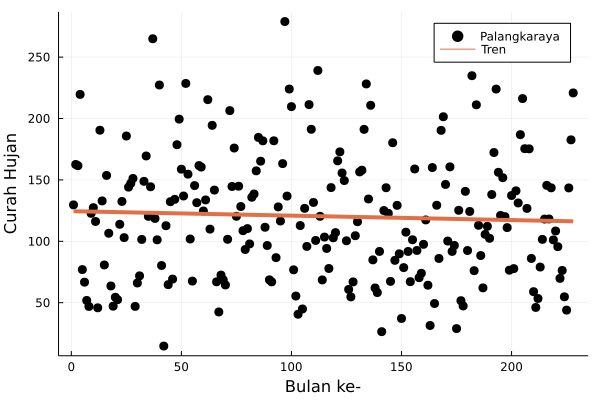

In [107]:
scatter(1:228, y4, color="Black", label="Palangkaraya", markersize=5, xaxis="Bulan ke-", yaxis="Curah Hujan")
plot!(1:228, A3*theta3, linewidth=4, label="Tren")

In [108]:
rms(Garis_trend3-y4)

51.124804965608035

### Estimation of Trend and Seasonal Component

Akan diestimasi nilai trend3 dengan menyelesaikan SPL Ax3=b3 dibawah ini, 

In [109]:
 m = 19*12;
 A33 = [ 0:(m-1) vcat([eye(12) for i=1:19]...) ];

In [110]:
b3=y4;

In [111]:
x3= A33 \ b3

13-element Vector{Float64}:
  -0.02620228567093043
 176.72348044035525
 163.37048795918417
 125.94487073011808
 175.22370642736797
 104.4269271835653
  72.99423058818358
  66.73060688911771
 102.34672629005172
  87.27842013414373
 119.59400744244623
 130.30603954811724
 155.2217207874723

In [112]:
tren3=A33*x3

228-element Vector{Float64}:
 176.72348044035525
 163.34428567351324
 125.89246615877622
 175.14509957035517
 104.32211804088158
  72.86321915982893
  66.57339317509212
 102.16331029035521
  87.06880184877629
 119.35818687140785
 130.04401669140793
 154.93349564509205
 176.40905301230407
 163.02985824546207
 125.57803873072505
 174.83067214230402
 104.00769061283042
  72.54879173177777
  66.25896574704096
 101.84888286230404
  86.75437442072513
 119.04375944335669
 129.72958926335676
 154.6190682170409
 176.09462558425292
 162.71543081741092
 125.2636113026739
 174.51624471425285
 103.69326318477924
  72.23436430372661
  65.9445383189898
 101.53445543425288
  86.43994699267395
 118.72933201530552
 129.4151618353056
 154.30464078898973
 175.78019815620175
 162.40100338935974
 124.94918387462273
 174.20181728620167
 103.37883575672808
  71.91993687567543
  65.63011089093862
 101.22002800620172
  86.12551956462279
 118.41490458725436
 129.10073440725444
 153.99021336093855
 175.4657707281

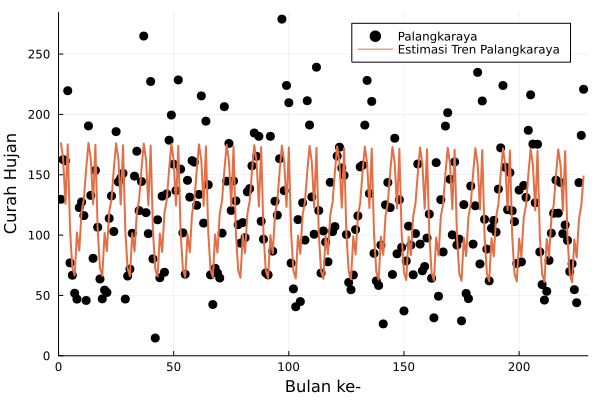

In [148]:
scatter(1:m, b3, color="black", markersize=5, label="Palangkaraya");
plot!(1:m, A33*x3, linewidth=2, label="Estimasi Tren Palangkaraya",
    xlims=(0,230), ylim=(0,285), xlabel="Bulan ke-", ylabel="Curah Hujan")

In [114]:
stdev(b3)

51.18003885086748

In [115]:
rms(tren3-y4)

35.70940213241271

## 4. Banjarmasin-Provinsi Kalimantan Selatan

### Estimation of Trend

  Akan ditentukan estimasi trend dengan menyelesaikan SPL Aθ=k1, sehingga haruslah di definisikan k1 dan A

In [116]:
data4 = y7;
n = length(data4);
A4 = [ ones(n) 1:n ]

228×2 Matrix{Float64}:
 1.0    1.0
 1.0    2.0
 1.0    3.0
 1.0    4.0
 1.0    5.0
 1.0    6.0
 1.0    7.0
 1.0    8.0
 1.0    9.0
 1.0   10.0
 1.0   11.0
 1.0   12.0
 1.0   13.0
 1.0   14.0
 1.0   15.0
 1.0   16.0
 1.0   17.0
 1.0   18.0
 1.0   19.0
 1.0   20.0
 1.0   21.0
 1.0   22.0
 1.0   23.0
 1.0   24.0
 1.0   25.0
 1.0   26.0
 1.0   27.0
 1.0   28.0
 1.0   29.0
 1.0   30.0
 1.0   31.0
 1.0   32.0
 1.0   33.0
 1.0   34.0
 1.0   35.0
 1.0   36.0
 1.0   37.0
 1.0   38.0
 1.0   39.0
 1.0   40.0
 1.0   41.0
 1.0   42.0
 1.0   43.0
 1.0   44.0
 1.0   45.0
 1.0   46.0
 1.0   47.0
 1.0   48.0
 1.0   49.0
 1.0   50.0
 1.0   51.0
 1.0   52.0
 1.0   53.0
 1.0   54.0
 1.0   55.0
 1.0   56.0
 1.0   57.0
 1.0   58.0
 1.0   59.0
 1.0   60.0
 1.0   61.0
 1.0   62.0
 1.0   63.0
 1.0   64.0
 1.0   65.0
 1.0   66.0
 1.0   67.0
 1.0   68.0
 1.0   69.0
 1.0   70.0
 1.0   71.0
 1.0   72.0
 1.0   73.0
 1.0   74.0
 1.0   75.0
 1.0   76.0
 1.0   77.0
 1.0   78.0
 1.0   79.0
 1.0   80.0
 1.0   81.0
 1.0 

diperoleh θ:

In [117]:
theta4 = A4 \ y7

2-element Vector{Float64}:
 102.47450180041012
  -0.0938719806807061

sehingga diperoleh :

garis_tren4=  102.47450180041012-0.0938719806807061i atau dapat dihitung dengan cara dibawah ini,

In [118]:
Garis_trend4 = A4*theta4

228-element Vector{Float64}:
 102.38062981972942
 102.28675783904872
 102.192885858368
 102.0990138776873
 102.0051418970066
 101.91126991632589
 101.81739793564518
 101.72352595496447
 101.62965397428377
 101.53578199360307
 101.44191001292236
 101.34803803224165
 101.25416605156094
 101.16029407088024
 101.06642209019954
 100.97255010951882
 100.87867812883812
 100.78480614815741
 100.69093416747671
 100.597062186796
 100.50319020611529
 100.40931822543459
 100.31544624475389
 100.22157426407318
 100.12770228339247
 100.03383030271176
  99.93995832203106
  99.84608634135036
  99.75221436066965
  99.65834237998894
  99.56447039930823
  99.47059841862753
  99.37672643794683
  99.28285445726611
  99.18898247658541
  99.0951104959047
  99.001238515224
  98.90736653454329
  98.81349455386258
  98.71962257318188
  98.62575059250118
  98.53187861182047
  98.43800663113976
  98.34413465045905
  98.25026266977835
  98.15639068909765
  98.06251870841693
  97.96864672773623
  97.87477474705553


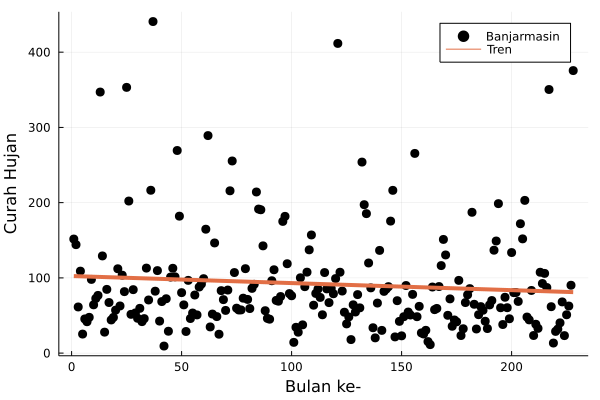

In [119]:
scatter(1:228, y7, color="Black", label="Banjarmasin", markersize=5, xaxis="Bulan ke-", yaxis="Curah Hujan")
plot!(1:228, A4*theta4, linewidth=4, label="Tren")

In [120]:
rms(Garis_trend4-y7)

70.89524011821725

### Estimation of Trend and Seasonal Component

Akan diestimasi nilai trend4 dengan menyelesaikan SPL Ax4=b4 dibawah ini, 

In [121]:
 m = 19*12;
 A44 = [ 0:(m-1) vcat([eye(12) for i=1:19]...) ];

In [122]:
b4=y7;

In [123]:
x4= A44 \ b4

13-element Vector{Float64}:
  -0.08493736402373292
 227.37252190666842
 154.520506568587
  72.38421080892638
  68.79135944452909
  65.8843763948686
  50.64465240273443
  64.3004409034424
  84.0308020243082
  73.27630354306878
  85.13878298551357
  93.75851451322156
 176.29613845408738

In [124]:
tren4=A44*x4

228-element Vector{Float64}:
 227.37252190666842
 154.43556920456325
  72.21433608087892
  68.53654735245789
  65.54462693877366
  50.219965582615764
  63.7908167193
  83.43624047614207
  72.59680463087892
  84.37434670929997
  92.90914087298422
 175.3618274498263
 226.35327353838363
 153.41632083627846
  71.19508771259412
  67.5172989841731
  64.52537857048887
  49.20071721433097
  62.7715683510152
  82.41699210785728
  71.57755626259411
  83.35509834101518
  91.88989250469943
 174.34257908154152
 225.33402517009884
 152.39707246799367
  70.17583934430932
  66.4980506158883
  63.506130202204076
  48.18146884604617
  61.752319982730405
  81.39774373957248
  70.55830789430932
  82.33584997273039
  90.87064413641464
 173.32333071325672
 224.31477680181405
 151.37782409970887
  69.15659097602453
  65.47880224760351
  62.48688183391928
  47.16222047776138
  60.73307161444561
  80.37849537128768
  69.53905952602453
  81.3166016044456
  89.85139576812985
 172.30408234497193
 223.295528433529

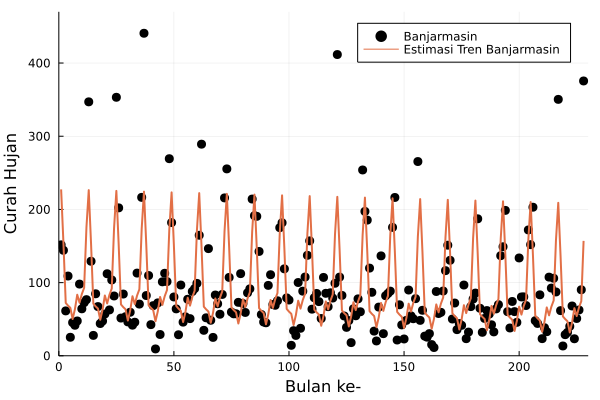

In [150]:
scatter(1:m, b4, color="black", markersize=5, label="Banjarmasin");
plot!(1:m, A44*x4, linewidth=2, label="Estimasi Tren Banjarmasin",
    xlims=(0,230), ylim=(0,470), xlabel="Bulan ke-", ylabel="Curah Hujan")

In [126]:
stdev(b4)

71.16394943442634

In [127]:
rms(tren4-y7)

47.856517759259994

## 5. Sintang-Provinsi Kalimantan Barat

### Estimation of Trend

  Akan ditentukan estimasi trend dengan menyelesaikan SPL Aθ=k1, sehingga haruslah di definisikan k1 dan A

In [128]:
data5 = y12;
n = length(data5);
A5 = [ ones(n) 1:n ]

228×2 Matrix{Float64}:
 1.0    1.0
 1.0    2.0
 1.0    3.0
 1.0    4.0
 1.0    5.0
 1.0    6.0
 1.0    7.0
 1.0    8.0
 1.0    9.0
 1.0   10.0
 1.0   11.0
 1.0   12.0
 1.0   13.0
 1.0   14.0
 1.0   15.0
 1.0   16.0
 1.0   17.0
 1.0   18.0
 1.0   19.0
 1.0   20.0
 1.0   21.0
 1.0   22.0
 1.0   23.0
 1.0   24.0
 1.0   25.0
 1.0   26.0
 1.0   27.0
 1.0   28.0
 1.0   29.0
 1.0   30.0
 1.0   31.0
 1.0   32.0
 1.0   33.0
 1.0   34.0
 1.0   35.0
 1.0   36.0
 1.0   37.0
 1.0   38.0
 1.0   39.0
 1.0   40.0
 1.0   41.0
 1.0   42.0
 1.0   43.0
 1.0   44.0
 1.0   45.0
 1.0   46.0
 1.0   47.0
 1.0   48.0
 1.0   49.0
 1.0   50.0
 1.0   51.0
 1.0   52.0
 1.0   53.0
 1.0   54.0
 1.0   55.0
 1.0   56.0
 1.0   57.0
 1.0   58.0
 1.0   59.0
 1.0   60.0
 1.0   61.0
 1.0   62.0
 1.0   63.0
 1.0   64.0
 1.0   65.0
 1.0   66.0
 1.0   67.0
 1.0   68.0
 1.0   69.0
 1.0   70.0
 1.0   71.0
 1.0   72.0
 1.0   73.0
 1.0   74.0
 1.0   75.0
 1.0   76.0
 1.0   77.0
 1.0   78.0
 1.0   79.0
 1.0   80.0
 1.0   81.0
 1.0 

diperoleh θ:

In [129]:
theta5 = A5 \ y12

2-element Vector{Float64}:
 103.5108627398675
   0.008602803275002454

sehingga diperoleh :

garis_tren5= 103.5108627398675+0.008602803275002454i atau dapat dihitung dengan cara dibawah ini,

In [130]:
Garis_trend5= A5*theta5

228-element Vector{Float64}:
 103.5194655431425
 103.52806834641751
 103.53667114969251
 103.54527395296752
 103.55387675624252
 103.56247955951753
 103.57108236279252
 103.57968516606752
 103.58828796934253
 103.59689077261753
 103.60549357589254
 103.61409637916753
 103.62269918244253
 103.63130198571754
 103.63990478899254
 103.64850759226755
 103.65711039554255
 103.66571319881756
 103.67431600209255
 103.68291880536755
 103.69152160864256
 103.70012441191756
 103.70872721519257
 103.71733001846756
 103.72593282174256
 103.73453562501757
 103.74313842829257
 103.75174123156758
 103.76034403484257
 103.76894683811759
 103.77754964139258
 103.78615244466758
 103.79475524794259
 103.80335805121759
 103.8119608544926
 103.8205636577676
 103.82916646104259
 103.8377692643176
 103.8463720675926
 103.85497487086761
 103.8635776741426
 103.87218047741761
 103.88078328069261
 103.88938608396761
 103.89798888724262
 103.90659169051762
 103.91519449379263
 103.92379729706762
 103.932400100342

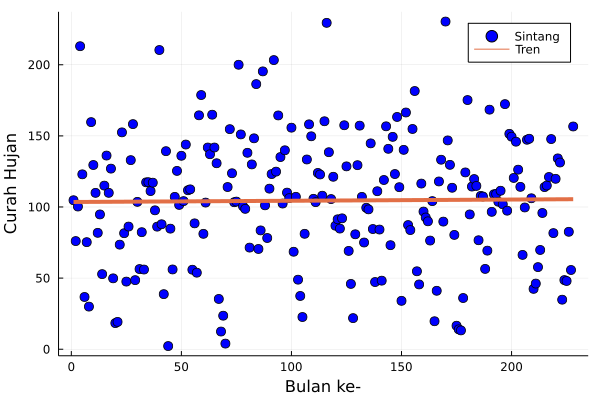

In [131]:
scatter(1:228, y12, color="Blue", label="Sintang", markersize=5, xaxis="Bulan ke-", yaxis="Curah Hujan")
plot!(1:228, A5*theta5, linewidth=4, label="Tren")

In [132]:
rms(Garis_trend5-y12)

44.223625718766336

### Estimation of Trend and Seasonal Component

In [133]:
 m = 19*12;
 A55 = [ 0:(m-1) vcat([eye(12) for i=1:19]...) ];

In [134]:
b5=y12;

In [135]:
x5= A55 \ b5

13-element Vector{Float64}:
   0.00943323409093581
  95.1887404576526
 107.82919053461438
 115.86880664683912
 145.4716130443272
 107.67724975707836
  87.21269474825061
  81.7087062620544
  80.22659861685818
  67.92092047966196
 100.36023453546575
 126.3219660767433
 125.31581858686285

In [136]:
tren5=A55*x5

228-element Vector{Float64}:
  95.1887404576526
 107.83862376870532
 115.88767311502099
 145.49991274660002
 107.7149826934421
  87.25986091870529
  81.76530566660001
  80.29263125549474
  67.99638635238945
 100.44513364228418
 126.41629841765265
 125.41958416186314
  95.30193926674383
 107.95182257779655
 116.00087192411222
 145.61311155569123
 107.82818150253333
  87.37305972779652
  81.87850447569124
  80.40583006458597
  68.10958516148068
 100.5583324513754
 126.52949722674389
 125.53278297095437
  95.41513807583506
 108.06502138688778
 116.11407073320345
 145.72631036478248
 107.94138031162456
  87.48625853688775
  81.99170328478247
  80.5190288736772
  68.22278397057191
 100.67153126046664
 126.64269603583512
 125.6459817800456
  95.52833688492629
 108.17822019597901
 116.22726954229468
 145.8395091738737
 108.05457912071579
  87.59945734597898
  82.1049020938737
  80.63222768276842
  68.33598277966314
 100.78473006955787
 126.75589484492635
 125.75918058913683
  95.6415356940175

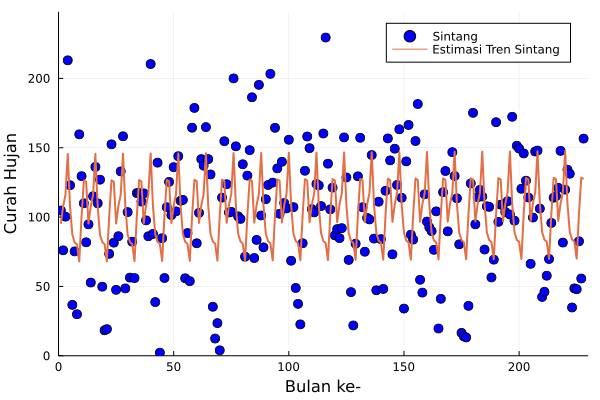

In [153]:
scatter(1:m, b5, color="blue", markersize=5, label="Sintang");
plot!(1:m, A55*x5, linewidth=2, label="Estimasi Tren Sintang",
    xlims=(0,230), ylim=(0,248), xlabel="Bulan ke-", ylabel="Curah Hujan")

In [138]:
stdev(b5)

44.22725030084239

In [139]:
rms(tren5-y12)

38.616372496667566

Kesimpulan :

     Telah dilakukan dua metode estimasi yaitu estimasi trend yang tidak dpengaruhi oleh pola musiman dan estimasi trend yang dipengaruhi oleh pola musiman. Dari estimasi trend data curah hujan yang tidak dipengaruhi oleh pola musiman diperoleh bahwa 4 Kota yaitu Samarinda, Tanjun Selor, Palangkaraya, dan Banjarmasin dari 5 kota yang penulis pilih memiliki trend turun, serta Sintang menjadi satu-satunya kota dengan trend data curah hujan naik. Oleh karena itu dapat disimpulkan untk data curah hujan bberapa kota di Kalimantan yang dipilih penulis, dari persamaan (1), jika θ_2 bernilai negatif, maka trend data turun. Selanjutnya untuk estimasi trend data yang dipengaruhi oleh pola musiman diperoleh bahwa trend dari data curah hujan cenderung naik-turun atau terjadi gerakan musiman pada waktu yang sama karena pergantian musim dalam satu tahun pada kota Samarinda dan Banjarmasin, disisi lain terjadi gerakan musiman dan dua kali kenaikan trend dalam waktu yang berdekatan pada Kota Tanjung Selor, Palangkaraya, dan Sintang.

     Untuk perhitungan standar deviasi dan Root Mean Square Error(RMSE) diperoleh data curah hujan di Tanjung Selor merupakan data dengan standar deviasi terkecil. Selanjutnya, dari RMSE dapat dilihat bahwa RMSE dari estimasi trend yang tidak dipengaruhi pola musiman cenderung lebih besar dibandingkan RMSE dari estimasi Trend yang dipengaruhi pola musiman, sehingga estimasi Trend yang dipengaruhi pola musiman lebih cocok diterapkan untuk mengestimasi trend dari data urah hujan dari beberapa kota di Kalimantan.
